# Perfil de intensidad de imagen por recorte pixel LED 

Para la medicion se utilizo un LED con corriente limite de 1mA y se fue modificando el porcentaje en pasos de 1%. Ademas se compruena la linealidad del LED con un sensor externo al que igual se le aplico pasos de 1%

In [18]:
# Importamos las librerias necesarias

import cv2
from PIL import Image
from pylab import * 
import numpy as np
import pandas as pd
from skimage.exposure import histogram as imhist
from skimage.color import rgb2gray 
import matplotlib.pyplot as plt

### Llamamos al DF



In [19]:
#El siguiente df son los datos obtenidos con el lector analogico

df = pd.read_csv("../LED2.csv")

In [20]:
# Mostramos la información de DF

df.info()
n_rows, n_cols = df.shape
print()
print(f"El DF tiene {n_rows} filas y {n_cols} columnas")
print()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Porcentaje  101 non-null    int64  
 1   Valor1      101 non-null    float64
 2   Valor2      101 non-null    float64
 3   Valor3      101 non-null    float64
 4   Promedio    101 non-null    float64
 5   Unidades    101 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.9+ KB

El DF tiene 101 filas y 6 columnas

   Porcentaje  Valor1  Valor2  Valor3  Promedio Unidades
0           0     0.0     0.0     0.0       0.0       uW
1           1     0.7     0.8     0.9       0.8       uW
2           2     0.8     0.9     1.0       0.9       uW
3           3     0.8     0.9     1.0       0.9       uW
4           4     0.9     1.0     1.1       1.0       uW


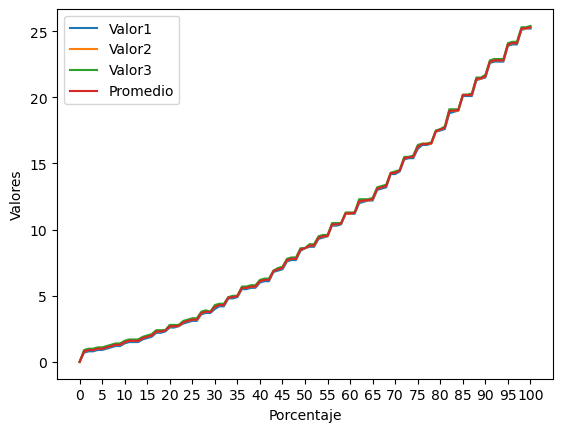

In [21]:
# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar cada columna
ax.plot(df['Porcentaje'], df['Valor1'], label='Valor1')
ax.plot(df['Porcentaje'], df['Valor2'], label='Valor2')
ax.plot(df['Porcentaje'], df['Valor3'], label='Valor3')
ax.plot(df['Porcentaje'], df['Promedio'], label='Promedio')

# Configurar leyenda
ax.legend()

# Configurar etiquetas de los ejes
ax.set_xlabel('Porcentaje')
ax.set_ylabel('Valores')

# Configurar la escala del eje x
ax.set_xticks(range(0, 101, 5))

# Mostrar la gráfica
plt.show()

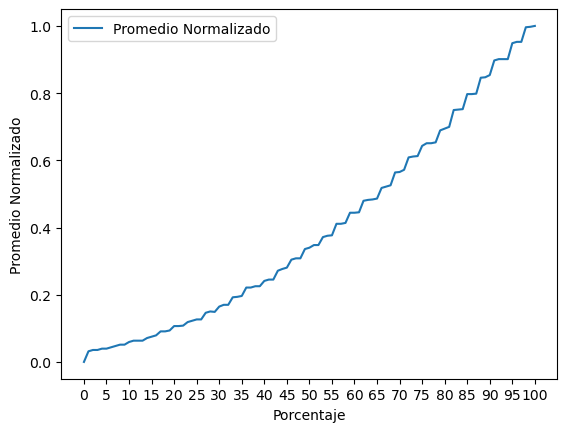

In [22]:
# Normalizar la columna 'Promedio' usando normalización min-max
df['Promedio Normalizado'] = (df['Promedio'] - df['Promedio'].min()) / (df['Promedio'].max() - df['Promedio'].min())

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar la columna 'Promedio Normalizado' contra 'Porcentaje'
ax.plot(df['Porcentaje'], df['Promedio Normalizado'], label='Promedio Normalizado')

# Configurar leyenda
ax.legend()

# Configurar etiquetas de los ejes
ax.set_xlabel('Porcentaje')
ax.set_ylabel('Promedio Normalizado')

# Configurar la escala del eje x
ax.set_xticks(range(0, 101, 5))

# Mostrar la gráfica
plt.show()

## Analisis para una imagen

El experimento se basa en tomar fotos con una camara CCD de un LED que va aumentando su potencia de 1% en 1% hasta llegar a 1mA, se coloco esa corriente debido a que una mayor saturaba la camara de manera anticipada.

In [23]:
# Cargamos imagen, se convierte a matriz
image = imread('../LED2/L40.png')
# Utilizamos shape para conocer las propiedades de nuestra matriz
print(image.shape)

(1024, 1280, 4)


In [24]:
# Nos aseguramos que la imagen sea un array de NumPy
image = np.array(image)

# Verificamos si la imagen tiene 4 canales
if image.shape[-1] == 4:
    # Elimina el canal alfa
    image = image[..., :3]

In [25]:
# Convertimos la imagen a escala de grises
image = rgb2gray(image)

In [26]:
# Obtenemos los histogramas
hist_image, bins_image = imhist(image)

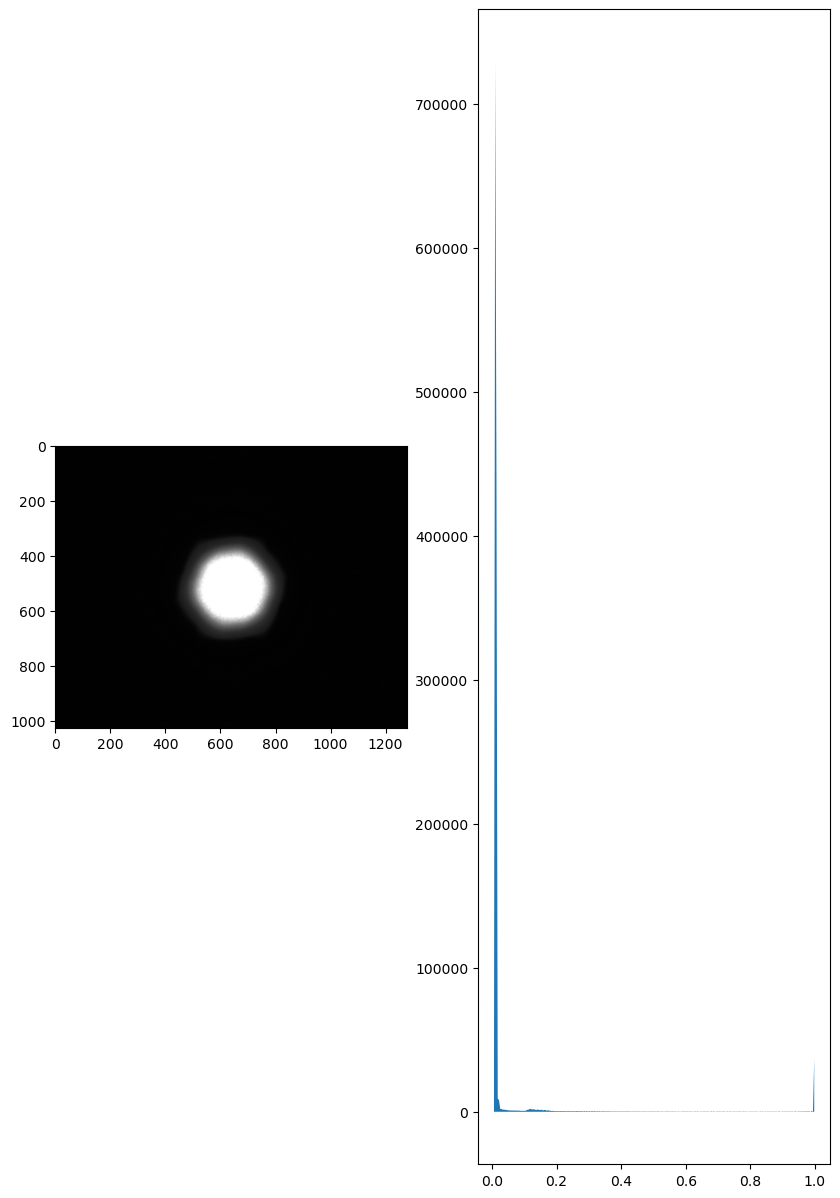

In [27]:
# Visualizamos
_, (image0, hist0), = subplots(1, 2, figsize=(10, 15))

# Original
image0.imshow(image, cmap="gray")
hist0.fill_between(bins_image, hist_image)

In [28]:
# Calculamos el promedio de intensidad
average_intensity = image.mean()

# Encontramos el valor máximo de número de píxeles y su correspondiente intensidad
max_pixel_value = hist_image.max()
max_intensity_value = bins_image[hist_image.argmax()]

print(f'Promedio de intensidad: {average_intensity}')
print(f'Punto máximo en valor de número de píxeles: {max_pixel_value}')
print(f'Máximo de intensidad: {max_intensity_value}')

Promedio de intensidad: 0.0595233216881752
Punto máximo en valor de número de píxeles: 729326
Máximo de intensidad: 0.009750168770551682


In [29]:
# Seleccionamos la línea central de la imagen en escala de grises
linea_pixeles = image[image.shape[0] // 2, :]  # Esto selecciona la fila central

# Determinamos la posición de los puntos a seleccionar (uno central y dos a cada lado)
centro = len(linea_pixeles) // 2
offset = len(linea_pixeles) // 10  # Elegimos un offset que no esté en los bordes

# Seleccionamos 5 puntos específicos en la línea central
puntos_seleccionados = [
    centro - 2 * offset,  # Punto 1: A la izquierda del centro
    centro - offset,      # Punto 2: A la izquierda del centro
    centro,               # Punto 3: Punto central
    centro + offset,      # Punto 4: A la derecha del centro
    centro + 2 * offset   # Punto 5: A la derecha del centro
]

# Obtenemos las intensidades correspondientes a estos puntos
intensidades = [linea_pixeles[punto] for punto in puntos_seleccionados]

# Creamos un DataFrame para mostrar las intensidades de los puntos seleccionados
df_puntos_intensidad = pd.DataFrame({
    'Pixel': puntos_seleccionados,
    'Intensidad': intensidades
})

# Mostramos el DataFrame resultante
print(df_puntos_intensidad)

   Pixel  Intensidad
0    384    0.011504
1    512    0.629675
2    640    1.000000
3    768    0.711034
4    896    0.012337


## Analisis para todas las imagenes

In [30]:
# Lista para almacenar los resultados
results = []

# Recorremos las imágenes desde B0 hasta B36
for i in range(100):
    # Formateamos el nombre de la imagen
    img_path = f'../LED2/L{i}.png'
    # Cargamos la imagen
    image = imread(img_path)
    
    # Verificamos si la imagen tiene 4 canales y eliminamos el canal alfa si es necesario
    if image.shape[-1] == 4:
        image = image[..., :3]
    
    # Convertimos la imagen a escala de grises
    image = rgb2gray(image)
    
    # Seleccionamos la línea central de la imagen
    linea_pixeles = image[image.shape[0] // 2, :]  # Esto selecciona la fila central

    # Determinamos la posición de los puntos a seleccionar (uno central y dos a cada lado)
    centro = len(linea_pixeles) // 2
    offset = len(linea_pixeles) // 10  # Elegimos un offset que no esté en los bordes

    # Seleccionamos 5 puntos específicos en la línea central
    puntos_seleccionados = [
        centro - 2 * offset,  # Punto 1: A la izquierda del centro
        centro - offset,      # Punto 2: A la izquierda del centro
        centro,               # Punto 3: Punto central
        centro + offset,      # Punto 4: A la derecha del centro
        centro + 2 * offset   # Punto 5: A la derecha del centro
    ]

    # Obtenemos las intensidades correspondientes a estos puntos
    intensidades = [linea_pixeles[punto] for punto in puntos_seleccionados]

    # Guardamos los resultados en la lista
    results.append({
        'Image': f'B{i}.png',
        'Pixel 1': intensidades[0],
        'Pixel 2': intensidades[1],
        'Pixel 3': intensidades[2],
        'Pixel 4': intensidades[3],
        'Pixel 5': intensidades[4]
    })

# Convertimos los resultados a un DataFrame
df_results = pd.DataFrame(results)

# Mostramos el DataFrame resultante
print(df_results)

      Image   Pixel 1   Pixel 2   Pixel 3   Pixel 4   Pixel 5
0    B0.png  0.010649  0.010649  0.010649  0.010649  0.010649
1    B1.png  0.011214  0.105433  0.131267  0.109600  0.011214
2    B2.png  0.011214  0.105433  0.130433  0.107933  0.011214
3    B3.png  0.011214  0.105433  0.129600  0.107100  0.011214
4    B4.png  0.011214  0.112933  0.165072  0.117933  0.009242
..      ...       ...       ...       ...       ...       ...
95  B95.png  0.022746  1.000000  1.000000  1.000000  0.023587
96  B96.png  0.021072  1.000000  1.000000  1.000000  0.019093
97  B97.png  0.024718  1.000000  1.000000  1.000000  0.021065
98  B98.png  0.020789  1.000000  1.000000  1.000000  0.022181
99  B99.png  0.021340  1.000000  1.000000  1.000000  0.020224

[100 rows x 6 columns]


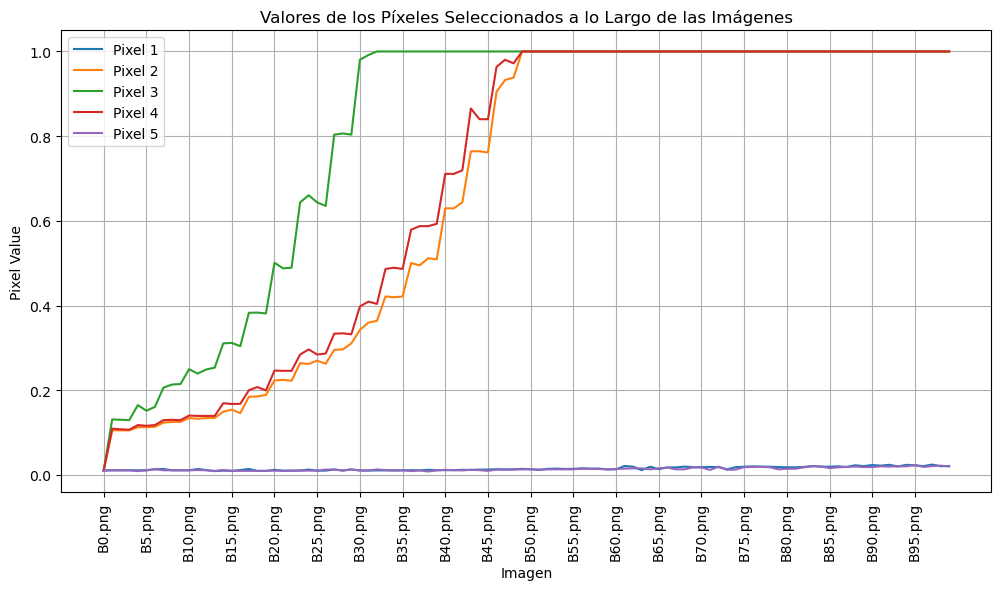

In [31]:
# Graficamos los resultados
plt.figure(figsize=(12, 6))
for i in range(1, 6):
    plt.plot(df_results['Image'], df_results[f'Pixel {i}'], label=f'Pixel {i}')

plt.xlabel('Imagen')
plt.ylabel('Pixel Value')
plt.title('Valores de los Píxeles Seleccionados a lo Largo de las Imágenes')
plt.legend()
plt.grid(True)
plt.xticks(ticks=range(0, len(df_results['Image']), 5), rotation=90)
plt.show()

## Mostramos la grafica de la normalizacion del sensor en superposicion a la de valor de pixel

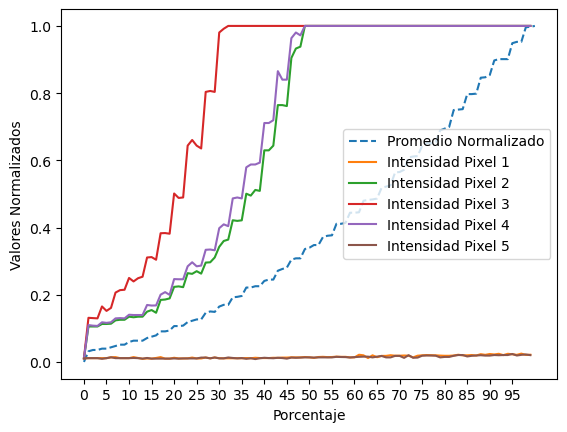

In [32]:
# Normalizar la columna 'Promedio' usando normalización min-max
df['Promedio Normalizado'] = (df['Promedio'] - df['Promedio'].min()) / (df['Promedio'].max() - df['Promedio'].min())

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar la columna 'Promedio Normalizado' contra 'Porcentaje'
ax.plot(df['Porcentaje'], df['Promedio Normalizado'], label='Promedio Normalizado', linestyle='--')

# Graficar la intensidad de los píxeles seleccionados para el Pixel 3 (considerando que es el central)
ax.plot(range(len(df_results)), df_results['Pixel 1'], label='Intensidad Pixel 1')
ax.plot(range(len(df_results)), df_results['Pixel 2'], label='Intensidad Pixel 2')
ax.plot(range(len(df_results)), df_results['Pixel 3'], label='Intensidad Pixel 3')
ax.plot(range(len(df_results)), df_results['Pixel 4'], label='Intensidad Pixel 4')
ax.plot(range(len(df_results)), df_results['Pixel 5'], label='Intensidad Pixel 5')


# Configurar leyenda
ax.legend()

# Configurar etiquetas de los ejes
ax.set_xlabel('Porcentaje')
ax.set_ylabel('Valores Normalizados')

# Configurar la escala del eje x con leyenda de 5 en 5
ax.set_xticks(range(0, len(df_results), 5))

# Mostrar la gráfica
plt.show()
